### 1. Import Libraries

In [139]:
# libraries used for handling the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Libraries used for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

## libraries to be used for metric evaluation
from sklearn.metrics import r2_score

### 2. Reading Dataset

In [140]:
df = pd.read_csv('redfin_2021-01-09-11-41-32.csv')

In [141]:
df.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Condo/Co-op,1111 S Akard St #316,Dallas,TX,75215.0,352000.0,3.0,2.5,...,Active,NaN,NaN,http://www.redfin.com/TX/Dallas/1111-S-Akard-S...,NTREIS,14486373,N,Y,32.772325,-96.794770
1,MLS Listing,NaN,Condo/Co-op,1200 Main St #404,Dallas,TX,75202.0,300000.0,2.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/TX/Dallas/1200-Main-St-7...,NTREIS,14465509,N,Y,32.780077,-96.801168
2,MLS Listing,NaN,Condo/Co-op,1200 Main St #1904,Dallas,TX,75202.0,325000.0,2.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/TX/Dallas/1200-Main-St-7...,NTREIS,14434367,N,Y,32.780077,-96.801168
3,MLS Listing,NaN,Condo/Co-op,1200 Main St #908,Dallas,TX,75202.0,247000.0,1.0,1.0,...,Active,NaN,NaN,http://www.redfin.com/TX/Dallas/1200-Main-St-7...,NTREIS,14483023,N,Y,32.780077,-96.801168
4,MLS Listing,NaN,Condo/Co-op,1200 Main St #1202,Dallas,TX,75202.0,196000.0,1.0,1.0,...,Active,NaN,NaN,http://www.redfin.com/TX/Dallas/1200-Main-St-7...,NTREIS,14419238,N,Y,32.780077,-96.801168


In [142]:
print("Shape of the dataset is:", df.shape)

Shape of the dataset is: (1017, 27)


### 3. Cleaning The Dataset

**Check how many of the features has null values in them**

In [143]:
df.isnull().mean()*100

SALE TYPE                                                                                       0.000000
SOLD DATE                                                                                     100.000000
PROPERTY TYPE                                                                                   0.098328
ADDRESS                                                                                         0.294985
CITY                                                                                            0.098328
STATE OR PROVINCE                                                                               0.098328
ZIP OR POSTAL CODE                                                                              0.098328
PRICE                                                                                           0.098328
BEDS                                                                                            0.098328
BATHS                                                  

From the above we can see that the features like: **SOLD DATE**, **NEXT OPEN HOUSE START TIME**, **NEXT OPEN HOUSE END TIME** has more than 90% of values missing, so we can drop these features.

Furthermore,there are some other features like below that we can also drop from our dataset:

**SALE TYPE**: By using value_counts we can see that it has 990/1017 as MLS LISTING, so we can drop them

**ADDRESS**: We can also drop this as this is unique for each property listed

**CITY**: We can drop this as this dataset is specifically for 'DALLAS'

**STATE OR PROVINCE**: This dataset is only for TX state

**ZIP OR POSTAL CODE**: We will be dropping this feature as we have LOCATION feature

**LOT SIZE**: We will also drop this feature as we are more interested in SQUARE FEET of property

**HOA/MONTH**: Here the missing values are more than 40%, so lets drop this also

**URL**: This is useless feature, drop this

**STATUS**: We can drop this feature, as using value_counts() we can see that all of values are ACTIVE

**SOURCE**: Using value_counts(), we can see that out of 1017, NTREIS has almost 990, so drop this!!

**FAVOURITE**: Here it has only 1 value which is 'N', so it is not useful

**INTERESTED**: Here it has only 1 value which is 'Y', which is not useful

**LATITUDE / LONGITUDE** : We already has the property LOCATION, so we dont require these features!!

**MLS#** : It contains unique values for each property so we can drop this

**SQUARE FEET**: As we are already given per squarefeet 


#### NOW LETS DROP THESE FEATURES

In [144]:
features_to_drop  = ['SALE TYPE','SOLD DATE','ADDRESS', 'CITY','STATE OR PROVINCE','ZIP OR POSTAL CODE','LOT SIZE',
                    'HOA/MONTH','NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME','URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
                     'SOURCE','FAVORITE','INTERESTED','LATITUDE','LONGITUDE','STATUS', 'MLS#', 'SQUARE FEET']

In [145]:
df.drop(features_to_drop,axis=1, inplace=True)

In [146]:
df.head()

,PROPERTY TYPE,PRICE,BEDS,BATHS,LOCATION,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET
0,Condo/Co-op,352000.0,3.0,2.5,Buzz Condo,2006.0,2.0,190.0
1,Condo/Co-op,300000.0,2.0,2.0,Metropolitan 1200 Main Street,1974.0,64.0,257.0
2,Condo/Co-op,325000.0,2.0,2.0,Metropolitan 1200 Main St Condo,1974.0,99.0,278.0
3,Condo/Co-op,247000.0,1.0,1.0,Metropolitan 1200 Main St Condo,1974.0,24.0,281.0
4,Condo/Co-op,196000.0,1.0,1.0,Metropolitan 1200 Main St Condo,1974.0,140.0,297.0


**Now, again check how many of the null values are present in features**

In [147]:
df.isnull().mean()*100

PROPERTY TYPE      0.098328
PRICE              0.098328
BEDS               0.098328
BATHS             10.521141
LOCATION           0.294985
YEAR BUILT         8.751229
DAYS ON MARKET     1.671583
$/SQUARE FEET      8.652901
dtype: float64

**Here one important thing to note is that 'PRICE' here is target variable and we see there are some values that are missing, so we should remove all the null values from PRICE column**

In [148]:
df.dropna(subset=['PRICE'],inplace=True)

In [149]:
df.isnull().mean()*100

PROPERTY TYPE      0.000000
PRICE              0.000000
BEDS               0.000000
BATHS             10.433071
LOCATION           0.196850
YEAR BUILT         8.661417
DAYS ON MARKET     1.574803
$/SQUARE FEET      8.562992
dtype: float64

***In the above we can see that all the features has less than 10% of missing values, so we can impute them***

In [150]:
def cleaning_function(data):
    
    # first drop those rows that has all the null values
    data.dropna(how='all')
    
    # Now, impute the features with missing values with the mode of values
    data['BATHS'].fillna(value=data['BATHS'].mode()[0],inplace=True)
    data['LOCATION'].fillna(value =data['LOCATION'].mode()[0],inplace=True)
    data['YEAR BUILT'].fillna(value = data['YEAR BUILT'].mode()[0], inplace=True)
    data['DAYS ON MARKET'].fillna(value = data['DAYS ON MARKET'].mode()[0], inplace=True)
    
    # Now impute the fetures with missing values with mean of values
    data['$/SQUARE FEET'].fillna(data['$/SQUARE FEET'].mean(),inplace=True)
    
    ## Now using YEAR BUILT, we can calculate the AGE as below
    data['AGE'] = 2021 - data['YEAR BUILT']
    data.drop('YEAR BUILT',axis=1,inplace=True)
    
    return data

In [151]:
df_cleaned = cleaning_function(df)

In [152]:
df_cleaned.head()

,PROPERTY TYPE,PRICE,BEDS,BATHS,LOCATION,DAYS ON MARKET,$/SQUARE FEET,AGE
0,Condo/Co-op,352000.0,3.0,2.5,Buzz Condo,2.0,190.0,15.0
1,Condo/Co-op,300000.0,2.0,2.0,Metropolitan 1200 Main Street,64.0,257.0,47.0
2,Condo/Co-op,325000.0,2.0,2.0,Metropolitan 1200 Main St Condo,99.0,278.0,47.0
3,Condo/Co-op,247000.0,1.0,1.0,Metropolitan 1200 Main St Condo,24.0,281.0,47.0
4,Condo/Co-op,196000.0,1.0,1.0,Metropolitan 1200 Main St Condo,140.0,297.0,47.0


### 4. Answering Some Questions

### Analysis -1: Top 20 most expensive locations in Texas based on current data

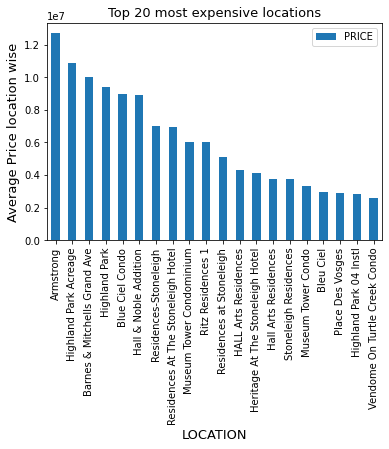

In [153]:
df_cleaned.groupby('LOCATION').agg({'PRICE':'mean'}).sort_values('PRICE',ascending=False)[:20].plot(kind='bar')
plt.xlabel('LOCATION',fontsize=13)
plt.ylabel('Average Price location wise', fontsize=13)
plt.title('Top 20 most expensive locations', fontsize=13);

**From the above we can see that Armstrong, followed by Highland Park Acreage are the most expensive ones**

### Analysis -2: How the property type varies with Property type

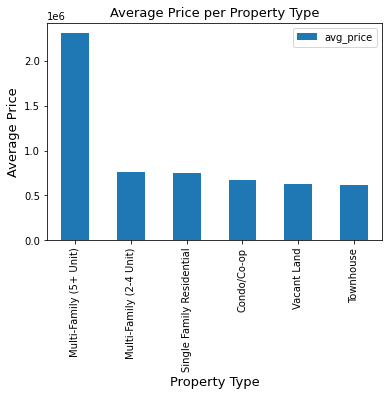

In [154]:
df_cleaned.groupby('PROPERTY TYPE').agg(avg_price = ('PRICE','mean')).sort_values('avg_price',ascending=False).plot(kind='bar')
plt.xlabel('Property Type', fontsize=13)
plt.ylabel('Average Price', fontsize=13)
plt.title('Average Price per Property Type',fontsize=13);

**From the above we can see that the Multi- Family (5_ units) are more costly as compared to others**

### Analysis -3: Variation of Price with Number of Baths

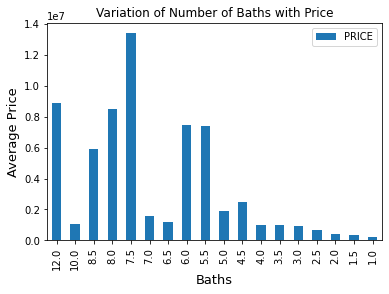

In [155]:
df_cleaned.groupby('BATHS').agg({'PRICE':'mean'}).sort_values('BATHS',ascending=False).plot(kind='bar')
plt.xlabel('Baths', fontsize=13)
plt.ylabel('Average Price', fontsize=13)
plt.title('Variation of Number of Baths with Price');

**Froom the above one common observation we have is that as more the number of baths more being the Price of property**

### 5. Machine Learning

In [156]:
df_cleaned.head()

,PROPERTY TYPE,PRICE,BEDS,BATHS,LOCATION,DAYS ON MARKET,$/SQUARE FEET,AGE
0,Condo/Co-op,352000.0,3.0,2.5,Buzz Condo,2.0,190.0,15.0
1,Condo/Co-op,300000.0,2.0,2.0,Metropolitan 1200 Main Street,64.0,257.0,47.0
2,Condo/Co-op,325000.0,2.0,2.0,Metropolitan 1200 Main St Condo,99.0,278.0,47.0
3,Condo/Co-op,247000.0,1.0,1.0,Metropolitan 1200 Main St Condo,24.0,281.0,47.0
4,Condo/Co-op,196000.0,1.0,1.0,Metropolitan 1200 Main St Condo,140.0,297.0,47.0


**A. Here we need to first check which all are qualitative features and we need to convert/create there dummies**

In [157]:
print("Features that are qualitative are :", df_cleaned.select_dtypes(include = ['object']).columns)

Features that are qualitative are : Index(['PROPERTY TYPE', 'LOCATION'], dtype='object')


In [158]:
print("Unique values in LOCATION feature are: ",df_cleaned.LOCATION.nunique())
print("Unique values in PROPERTY TYPE feature are: ",df_cleaned['PROPERTY TYPE'].nunique())

Unique values in LOCATION feature are:  610
Unique values in PROPERTY TYPE feature are:  6


**Here LOCATION features has 610 unique values, so we can remove them and can only convert PROPERTY TYPE into dummies**

In [159]:
dummies = pd.get_dummies(df_cleaned['PROPERTY TYPE'],prefix = "PT",prefix_sep="_")
df_cleaned = pd.concat((df_cleaned.drop('PROPERTY TYPE',axis=1),dummies),axis=1)

In [160]:
X = df_cleaned.drop('LOCATION',axis=1)
y = df_cleaned['PRICE']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Lets Standardize the Dataset**

In [162]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

***Since this is a supervised and an regression problem, we will be using different regression techniques like: Decision tree regressor, Ridge Regression, XGBoost regressor, random forest regressor and see which one gives us the best r2 (r-squared) value and we can use that model for to find out best features usuing feature importance***

In [163]:
for alg in ["DecisionTreeRegressor","RandomForestRegressor","xgb"]:
    if alg == "DecisionTreeRegressor": model = DecisionTreeRegressor();
    elif alg == "RandomForestRegressor" : model = RandomForestRegressor();
    elif alg == "xgb" : model = xgb.XGBRFRegressor()
        
    model.fit(X_train_sc,y_train)
    pred = model.predict(X_test_sc)
    print(f"R-square value for {alg} is :",r2_score(y_test,pred))

R-square value for DecisionTreeRegressor is : 0.9123114528479371
R-square value for RandomForestRegressor is : 0.9043865796716944
R-square value for xgb is : 0.9344487707213833


**From the above we can see that XGBOOST brings the best results. So, we can use it to find out which all are the important features in our dataset**

In [165]:
model = xgb.XGBRFRegressor()
model.fit(X_train_sc,y_train)
predictions = model.predict(X_test_sc)

In [175]:
feature_imp = sorted(zip(df_cleaned.columns, model.feature_importances_), key = lambda x : x[-1],reverse=True)

In [176]:
df_feature_imp = pd.DataFrame(feature_imp, columns=['Features','Scores'])

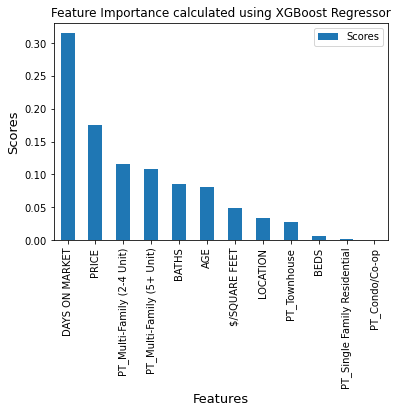

In [182]:
df_feature_imp.set_index('Features').plot(kind='bar')
plt.xlabel('Features', fontsize=13)
plt.ylabel('Scores', fontsize=13)
plt.title('Feature Importance calculated using XGBoost Regressor');

**From the above we can see that according to XGBOOST Regressor, best features comes out to be are:**

**1.** DAYS ON MARKET: It means people check for how long the property is listed on website

**2.** PT_Multi-Family(2-4): It means that people prefer units that has 2-4 beds

**3.** BATHS: Baths are also one of the most important,as the number of BATHS increases, PRICE increases

**4.** AGE: It defined how old is the property and certainly one of the important predictor.